# Fire Detection using YOLOv9

In [1]:
!unzip /content/drive/MyDrive/sensviz/fire.zip -d /content/fire

Streaming output truncated to the last 5000 lines.
  inflating: /content/fire/fire/train/images/WEBFire1151.jpg  
  inflating: /content/fire/fire/train/images/WEBFire1152.jpg  
  inflating: /content/fire/fire/train/images/WEBFire1155.jpg  
  inflating: /content/fire/fire/train/images/WEBFire1157.jpg  
  inflating: /content/fire/fire/train/images/WEBFire1169.jpg  
  inflating: /content/fire/fire/train/images/WEBFire1171.jpg  
  inflating: /content/fire/fire/train/images/WEBFire1178.jpg  
  inflating: /content/fire/fire/train/images/WEBFire1179.jpg  
  inflating: /content/fire/fire/train/images/WEBFire1180.jpg  
  inflating: /content/fire/fire/train/images/WEBFire1183.jpg  
  inflating: /content/fire/fire/train/images/WEBFire1185.jpg  
  inflating: /content/fire/fire/train/images/WEBFire1186.jpg  
  inflating: /content/fire/fire/train/images/WEBFire1187.jpg  
  inflating: /content/fire/fire/train/images/WEBFire1188.jpg  
  inflating: /content/fire/fire/train/images/WEBFire1189.jpg  
  in

In [2]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 325 (delta 159), reused 156 (delta 156), pack-reused 107
Receiving objects: 100% (325/325), 2.23 MiB | 1.18 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 187.8 kB/s eta 0:00:00


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content/yolov9


## Download model Weights

In [4]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [5]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x  2 root root      4096 Aug 12 14:15 .
drwxr-xr-x 12 root root      4096 Aug 12 14:15 ..
-rw-r--r--  1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r--  1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r--  1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r--  1 root root 140217688 Feb 18 12:36 yolov9-e.pt


In [6]:
SOURCE_IMAGE_PATH = f"/content/fire/fire/train/images/00980a5f319aec67.jpg"

## Detection With Pre trainned coco model

In [7]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source /content/fire/fire/train/images/00980a5f319aec67.jpg --device 0

detect: weights=['/content/yolov9/weights/gelan-c.pt'], source=/content/fire/fire/train/images/00980a5f319aec67.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/fire/fire/train/images/00980a5f319aec67.jpg: 576x640 1 cat, 1 oven, 121.4ms
Speed: 0.5ms pre-process, 121.4ms inference, 714.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


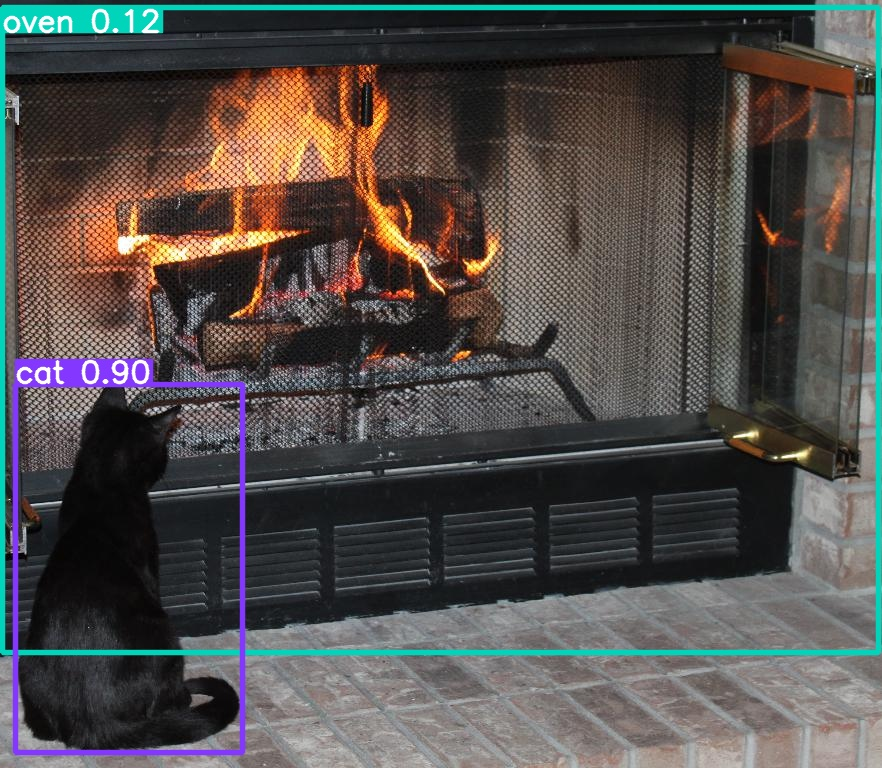

In [9]:
from IPython.display import Image

Image(filename=f"{HOME}/runs/detect/exp/00980a5f319aec67.jpg", width=600)

In [15]:
%cd {HOME}/

!python train.py \
--batch 16 --epochs 5 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/yolov9/fire/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-08-12 14:24:21.024756: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-12 14:24:21.046033: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-12 14:24:21.052412: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-12 14:24:21.067590: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-12 14:24:22.331654: W tensorf

In [ ]:
# /content/yolov9/fire/data.yaml

In [17]:
!ls {HOME}/runs/train/exp6/

confusion_matrix.png				    PR_curve.png	   val_batch0_pred.jpg
events.out.tfevents.1723472663.9ad2d05aafd6.4162.0  R_curve.png		   val_batch1_labels.jpg
F1_curve.png					    results.csv		   val_batch1_pred.jpg
hyp.yaml					    results.png		   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	   val_batch2_pred.jpg
labels.jpg					    train_batch1.jpg	   weights
opt.yaml					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


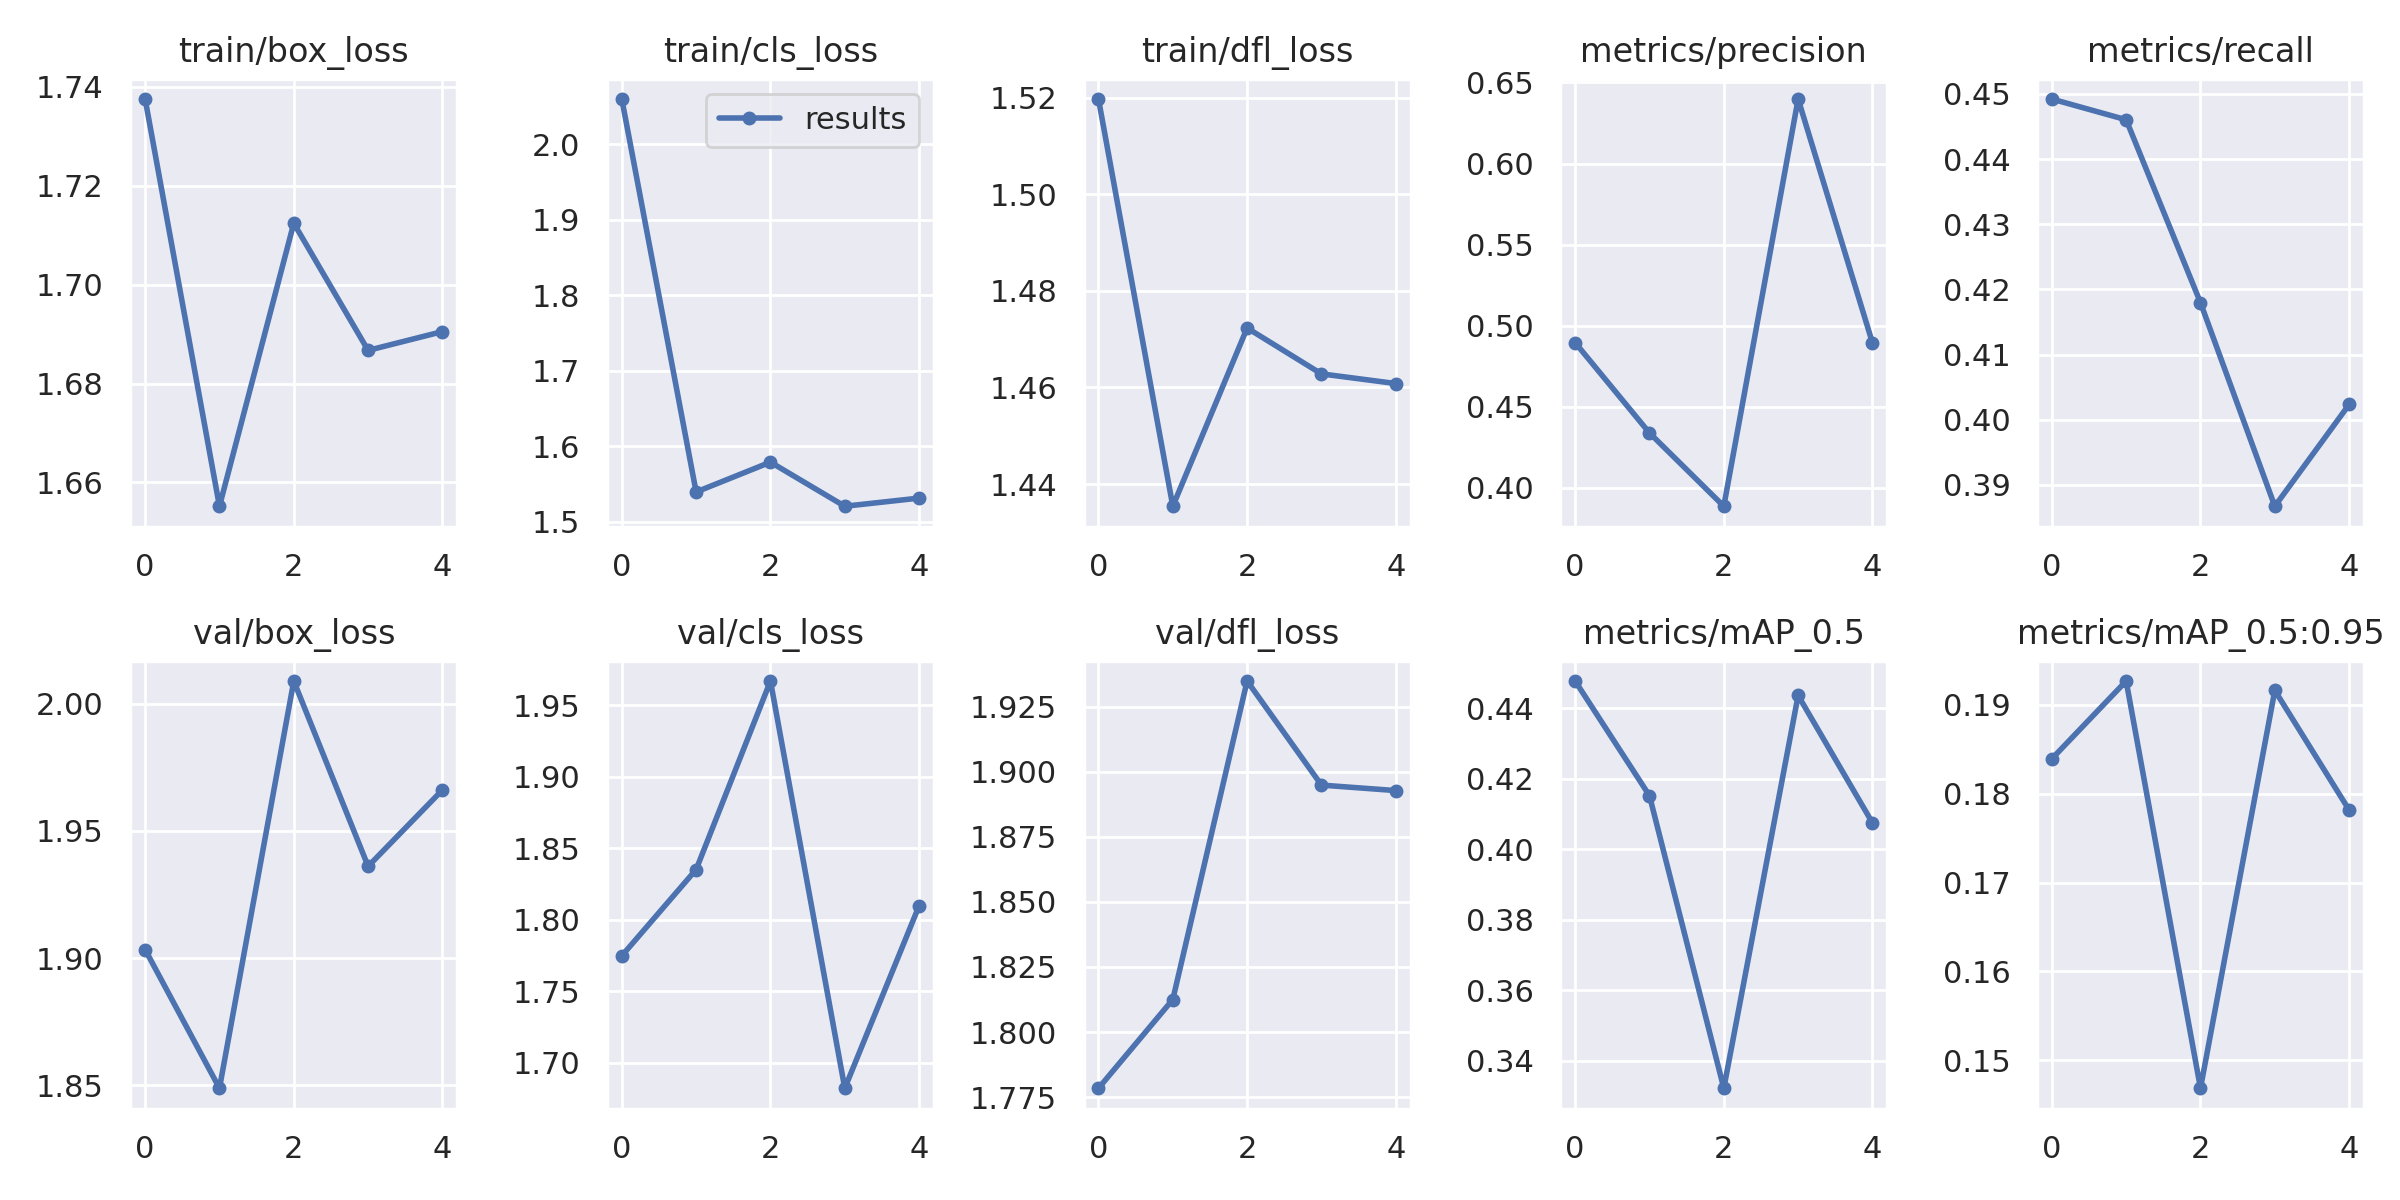

In [20]:
from IPython.display import Image

Image(filename=f"{HOME}/runs/train/exp6/results.png", width=1000)

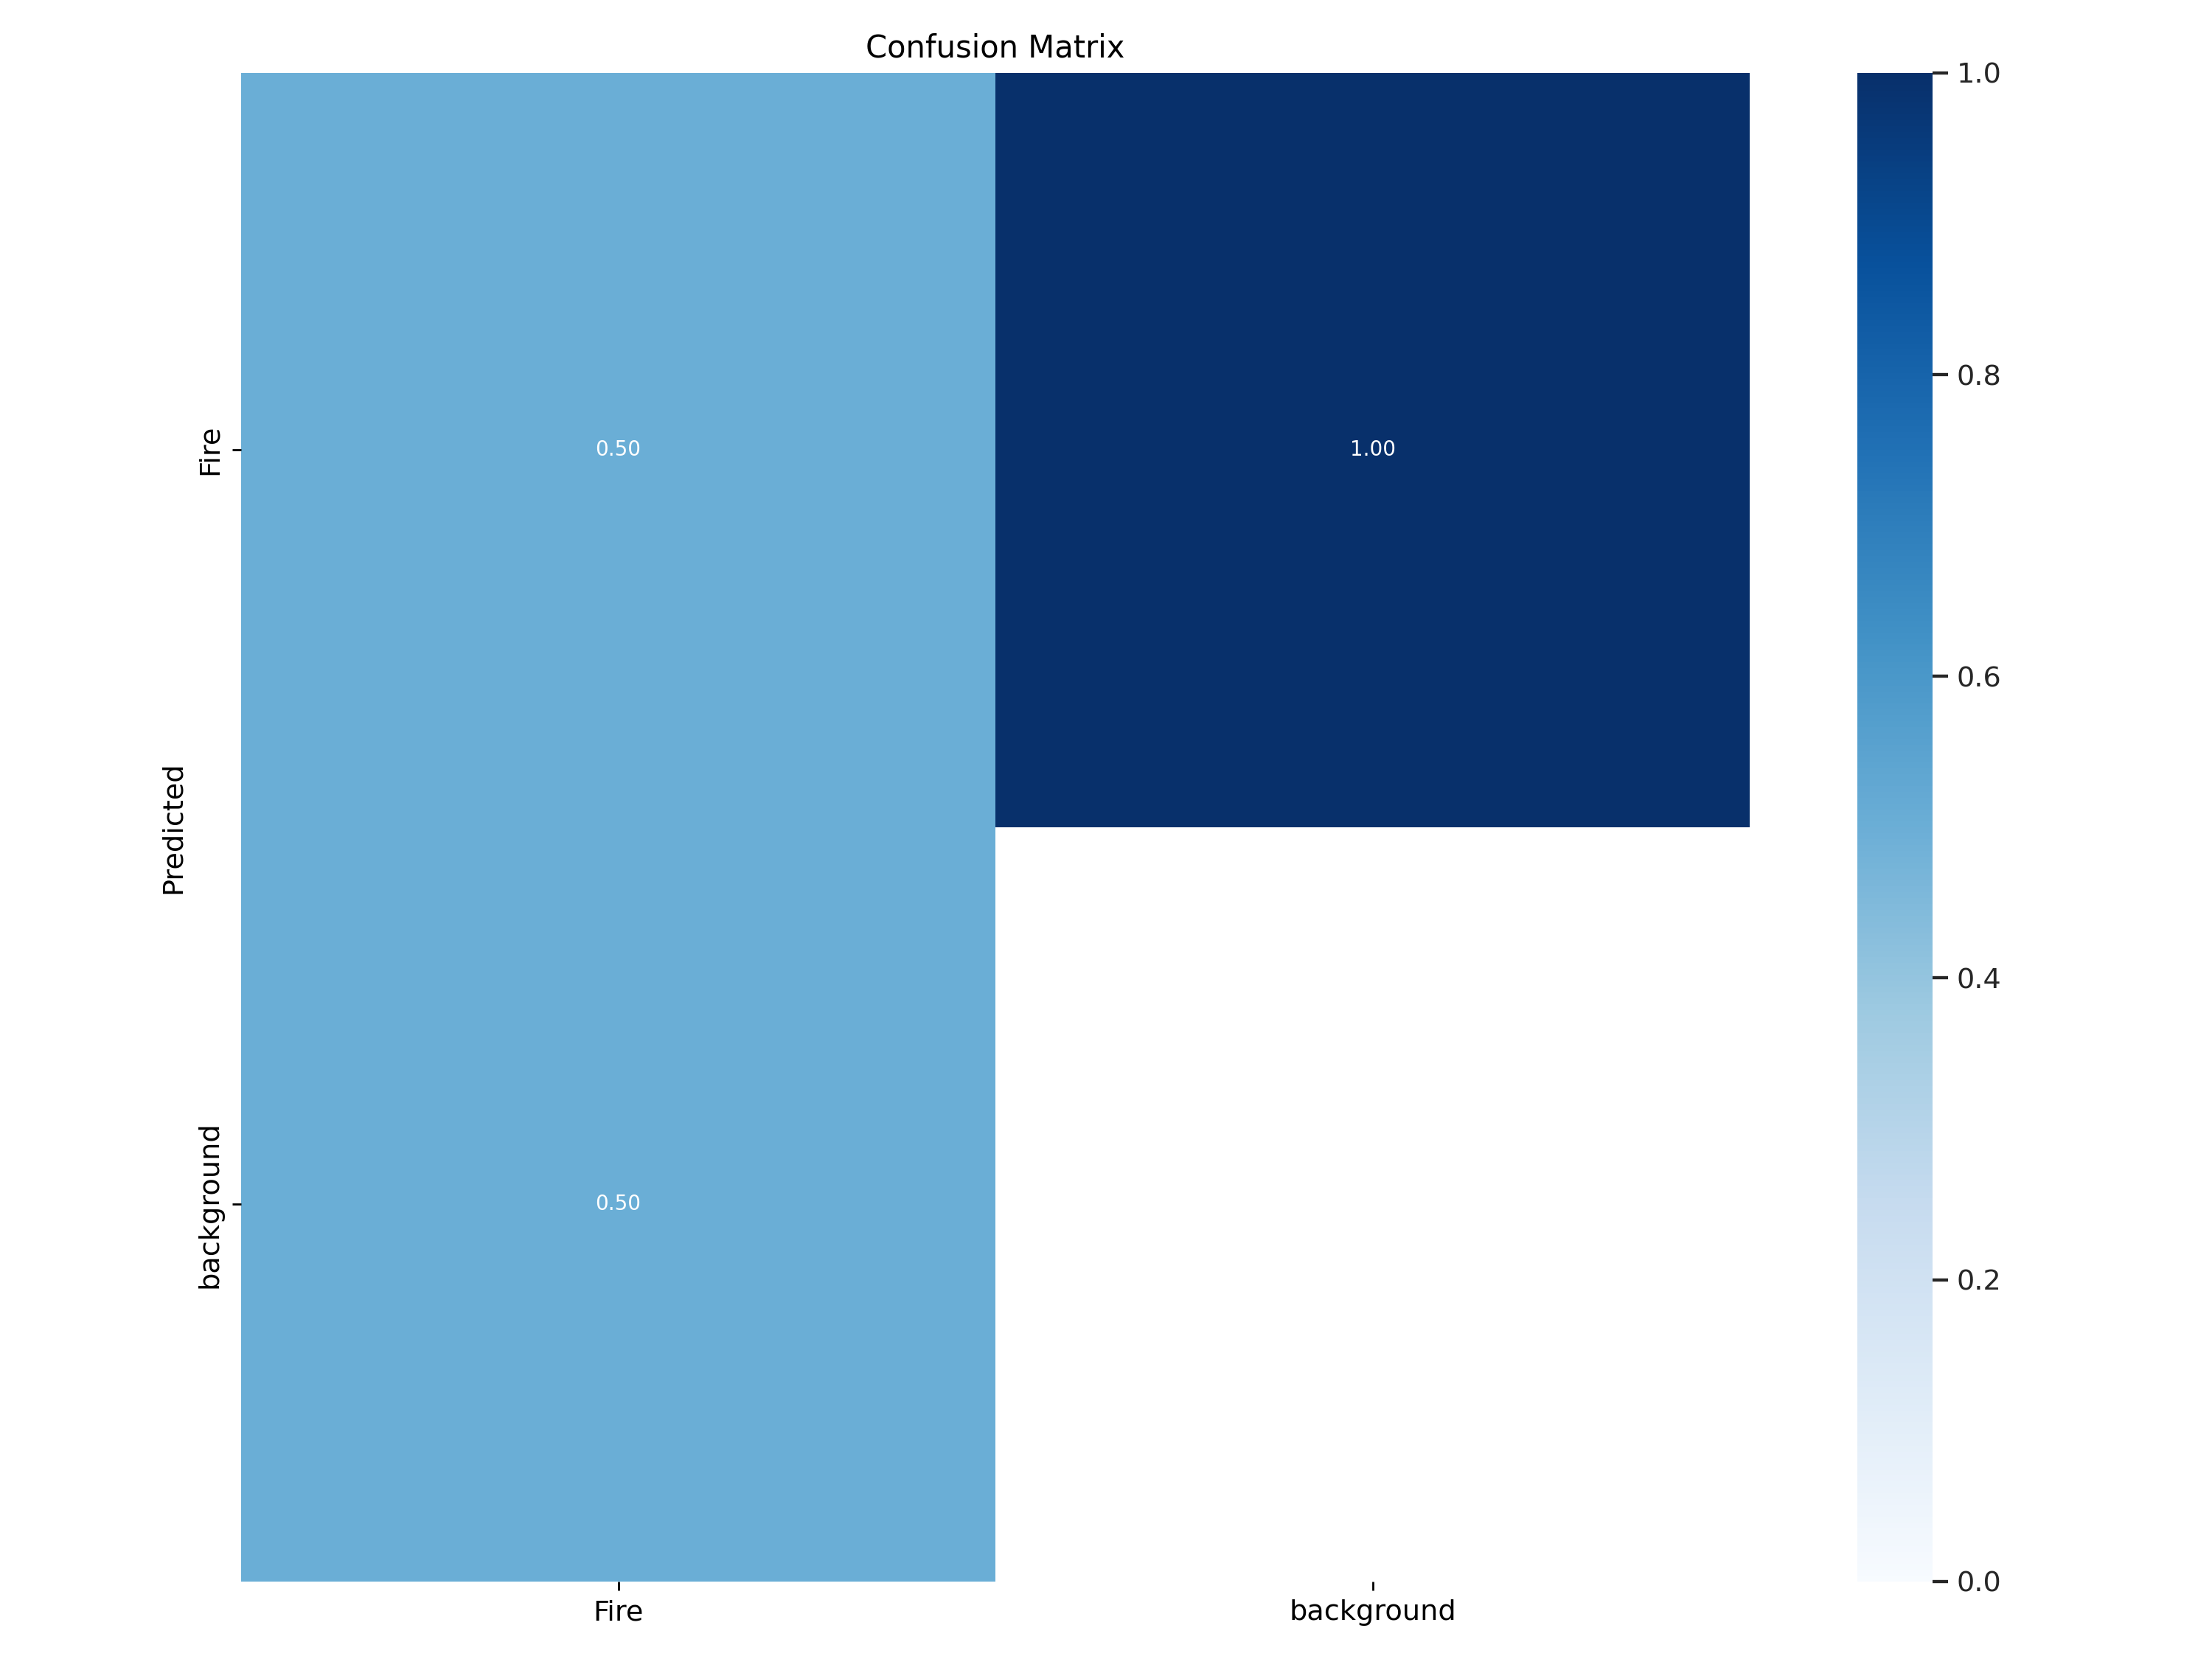

In [23]:
from IPython.display import Image

Image(filename=f"{HOME}/runs/train/exp6/confusion_matrix.png", width=1000)

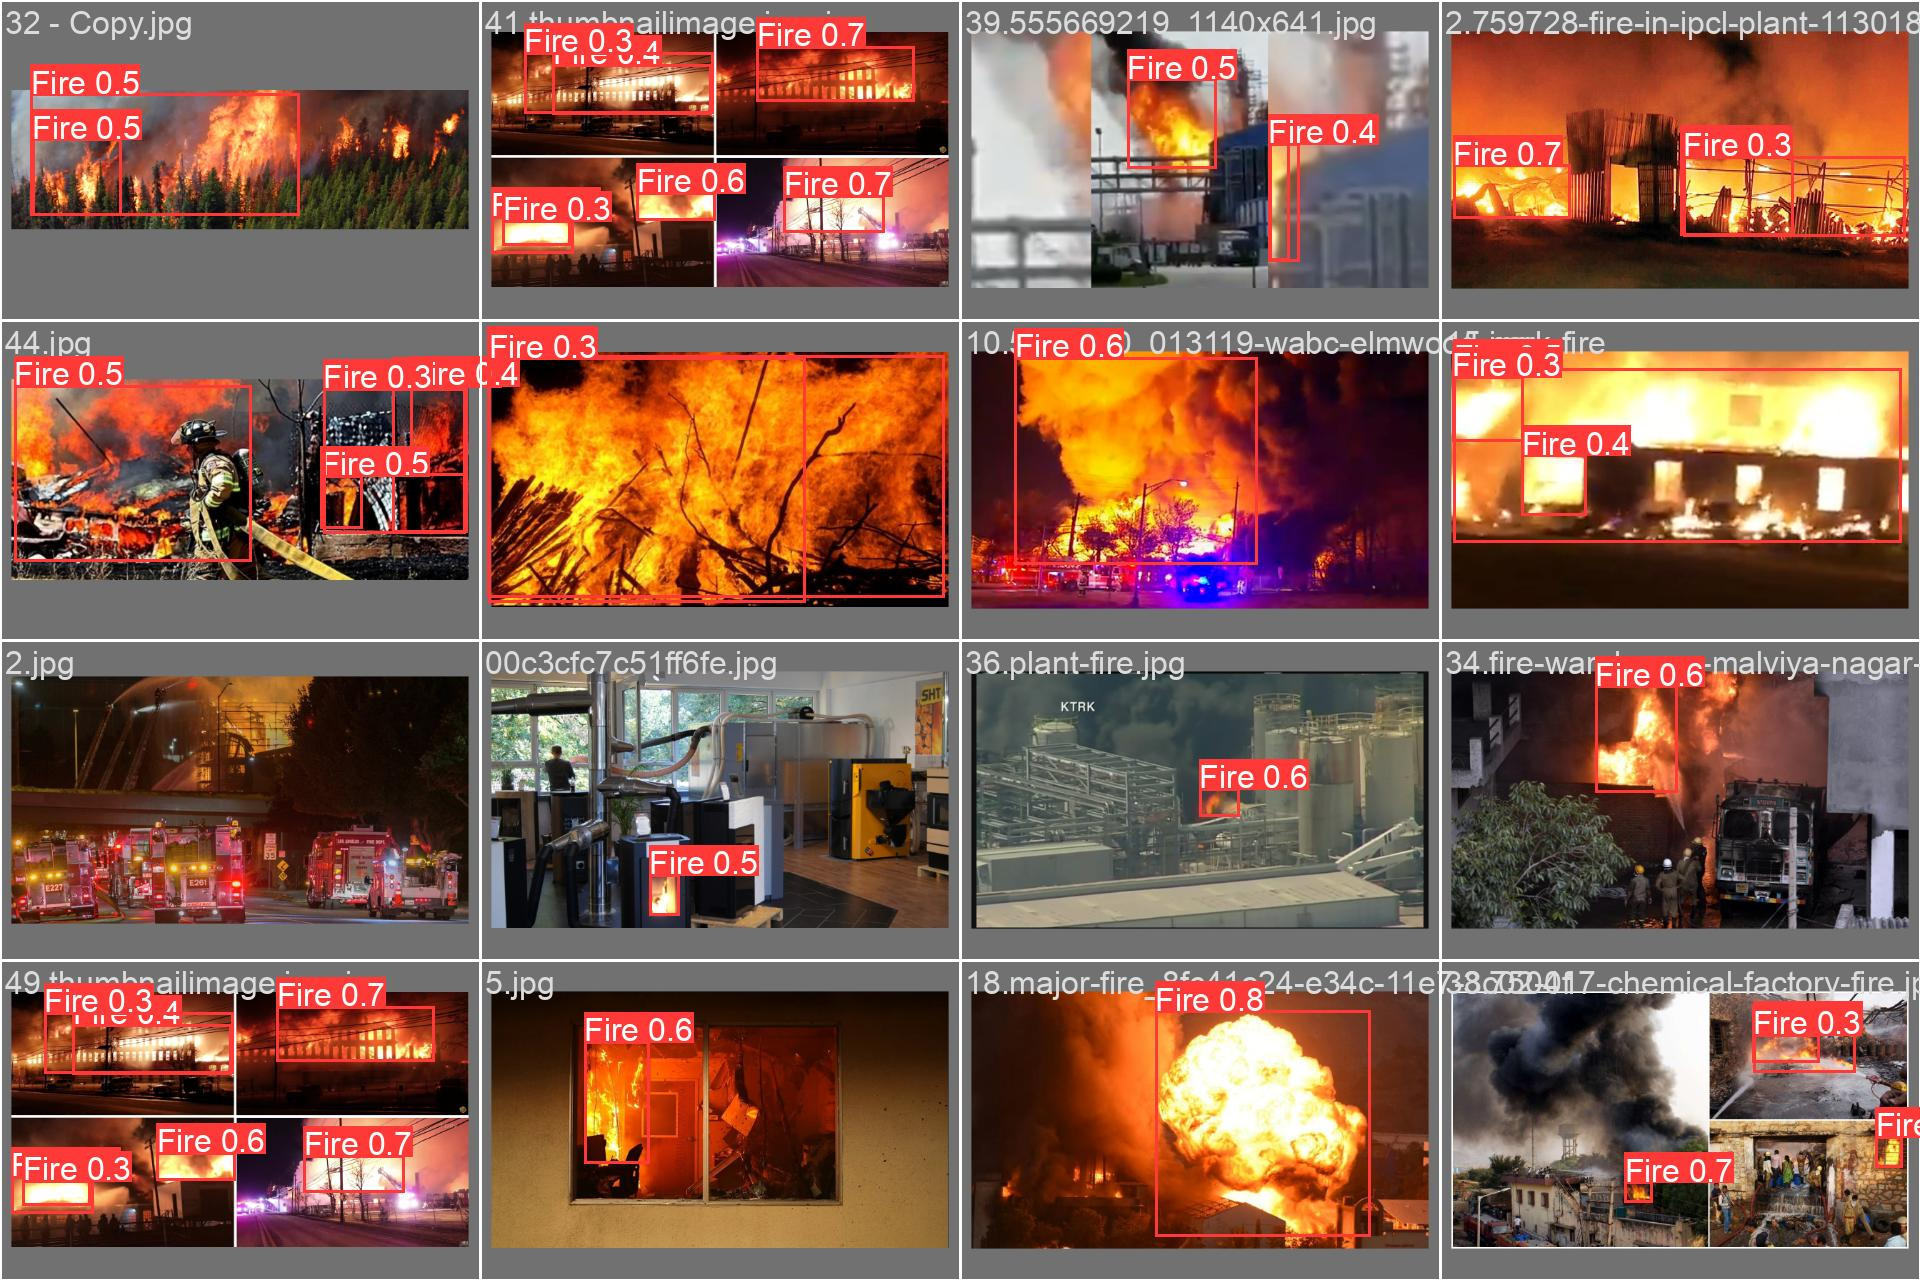

In [25]:
from IPython.display import Image

Image(filename=f"{HOME}/runs/train/exp6/val_batch0_pred.jpg", width=1000)